# CAR PRICE PREDICTION - Using RANDOM FOREST ALGORITHM

# STEPS DONE:
- Create new environment (carprediction)
    - Open cmd prompt
     - conda create -n carprediction python=3.7
     - Go to the working directory
         - cd give the directory name
         - activate carprediction (environment name)
         - launch jupyter notebook
- Open cmd prompt
- After creating model:
    - Create Pickle file (code)
    - pip freeze > requirements.txt (to create requirements file)
    - conda info --envs (to check for the environments created)
    - pip install flask
    - pip install jsonify
    - pip install requests
    - pip install sklearn
    
    

# OBJECTIVE
- This dataset contains information about used cars.
- This data can be used for a lot of purposes such as price prediction to exemplify the use of linear regression in Machine Learning.
- Algorithm used - Random Forest

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset=pd.read_csv("Car data.csv")
dataset.head(5)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


# DATASET DESCRIPTION

#### The columns in the given dataset are as follows:

- name - Name of the cars
- year - Year of the car when it was bought
- selling_price - Price at which the car is being sold
- km_driven - Number of Kilometres the car is driven
- fuel - Fuel type of car (petrol / diesel / CNG / LPG / electric)
- seller_type - Tells if a Seller is Individual or a Dealer
- transmission - Gear transmission of the car (Automatic/Manual)
- Owner - Number of previous owners of the car.

# DATASET ANALYSIS

In [3]:
dataset.shape

(301, 9)

In [4]:
dataset.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [5]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,301.0,2013.627907,2.891554,2003.00,2012.0,2014.0,2016.0,2018.0
Selling_Price,301.0,4.661296,5.082812,0.10,0.9,3.6,6.0,35.0
Present_Price,301.0,7.628472,8.644115,0.32,1.2,6.4,9.9,92.6
Kms_Driven,301.0,36947.205980,38886.883882,500.00,15000.0,32000.0,48767.0,500000.0
Owner,301.0,0.043189,0.247915,0.00,0.0,0.0,0.0,3.0


OBSERVATION:
- Year --> Maximum year is 2018, Minimum is 2003
- Selling_Price --> Minimum 0.10 and maximum is 35
- Present_Price --> Minimum 0.32 and maximum 92.6
- Kms_Driven --> Minimum 500kms and maximum 500000 kms

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


# CHECKING FOR MISSING VALUES

In [7]:
# Checking for null values
dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

OBSERVATION:
- There are no null values in the dataset.

# PRINTING COLUMNS WITH OBJECT DATATYPE

In [8]:
object=dataset.select_dtypes(include="object").columns
object

Index(['Car_Name', 'Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object')

### FINDING UNIQUE VALUES IN THE CATEGORICAL COLUMNS

In [9]:
print(dataset["Seller_Type"].unique())
print(dataset["Fuel_Type"].unique())
print(dataset["Transmission"].unique())
print(dataset["Owner"].unique())

['Dealer' 'Individual']
['Petrol' 'Diesel' 'CNG']
['Manual' 'Automatic']
[0 1 3]


# PREPARING THE DATASET 

In [10]:
# REMOVING Car_Name COLUMN - as we are going to predict the selling price of a car by using present price, car name column is removed
final_dataset=dataset[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]
final_dataset.columns

Index(['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Fuel_Type',
       'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

# DERIVING NEW FEATURE - CURRENT YEAR

In [11]:
final_dataset["Current_Year"]=2022

In [12]:
final_dataset.columns

Index(['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Fuel_Type',
       'Seller_Type', 'Transmission', 'Owner', 'Current_Year'],
      dtype='object')

# FINDING THE TOTAL YEARS = CURRENT YEAR - YEAR

In [13]:
final_dataset["Total_Years"]=final_dataset["Current_Year"]-final_dataset["Year"]
final_dataset.columns

Index(['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Fuel_Type',
       'Seller_Type', 'Transmission', 'Owner', 'Current_Year', 'Total_Years'],
      dtype='object')

In [14]:
final_dataset.head(5)

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year,Total_Years
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2022,8
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2022,9
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2022,5
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2022,11
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2022,8


# DROPPING THE COLUMN YEAR AND CURRENT_YEAR

In [15]:
final_dataset.drop(["Year","Current_Year"],axis=1,inplace=True)

In [16]:
final_dataset.head(5)

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Total_Years
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,8
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,9
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,5
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,11
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,8


# CONVERTING CATEGORICAL FEATURES TO NUMERICALS

In [17]:
#final_dataset.select_dtypes(include="object").columns

In [18]:
#final_dataset=pd.get_dummies(final_dataset,drop_first=True) # drop_first = drops the first column of the dummy column
# final_dataset.to_excel("C:\\Users\\Priya\\Desktop\\dummy.xls")

In [19]:
print(final_dataset["Fuel_Type"].unique())
print(final_dataset["Seller_Type"].unique())
print(final_dataset["Transmission"].unique())


['Petrol' 'Diesel' 'CNG']
['Dealer' 'Individual']
['Manual' 'Automatic']


In [20]:
#final_dataset
cleanup_nums = {"num_doors":     {"four": 4, "two": 2},
                "num_cylinders": {"four": 4, "six": 6, "five": 5, "eight": 8,
                                  "two": 2, "twelve": 12, "three":3 }}

In [21]:
category_replace={
                  "Fuel_Type": {"Petrol":0, "Diesel" :1,"CNG":2},
                  "Seller_Type": {"Dealer":0,"Individual":1},
                  "Transmission": {"Manual":0,"Automatic":1}
                 }

In [22]:
final_dataset.replace(category_replace,inplace=True)

#  FINDING CORRELATION

In [23]:
final_dataset.corr()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Total_Years
Selling_Price,1.000000,0.878983,0.029187,0.509467,-0.550724,0.367128,-0.088344,-0.236141
Present_Price,0.878983,1.000000,0.203647,0.440415,-0.512030,0.348715,0.008057,0.047584
Kms_Driven,0.029187,0.203647,1.000000,0.166801,-0.101419,0.162510,0.089216,0.524342
Fuel_Type,0.509467,0.440415,0.166801,1.000000,-0.352415,0.080466,-0.055705,-0.053643
Seller_Type,-0.550724,-0.512030,-0.101419,-0.352415,1.000000,-0.063240,0.124269,0.039896
Transmission,0.367128,0.348715,0.162510,0.080466,-0.063240,1.000000,0.050316,0.000394
Owner,-0.088344,0.008057,0.089216,-0.055705,0.124269,0.050316,1.000000,0.182104
Total_Years,-0.236141,0.047584,0.524342,-0.053643,0.039896,0.000394,0.182104,1.000000


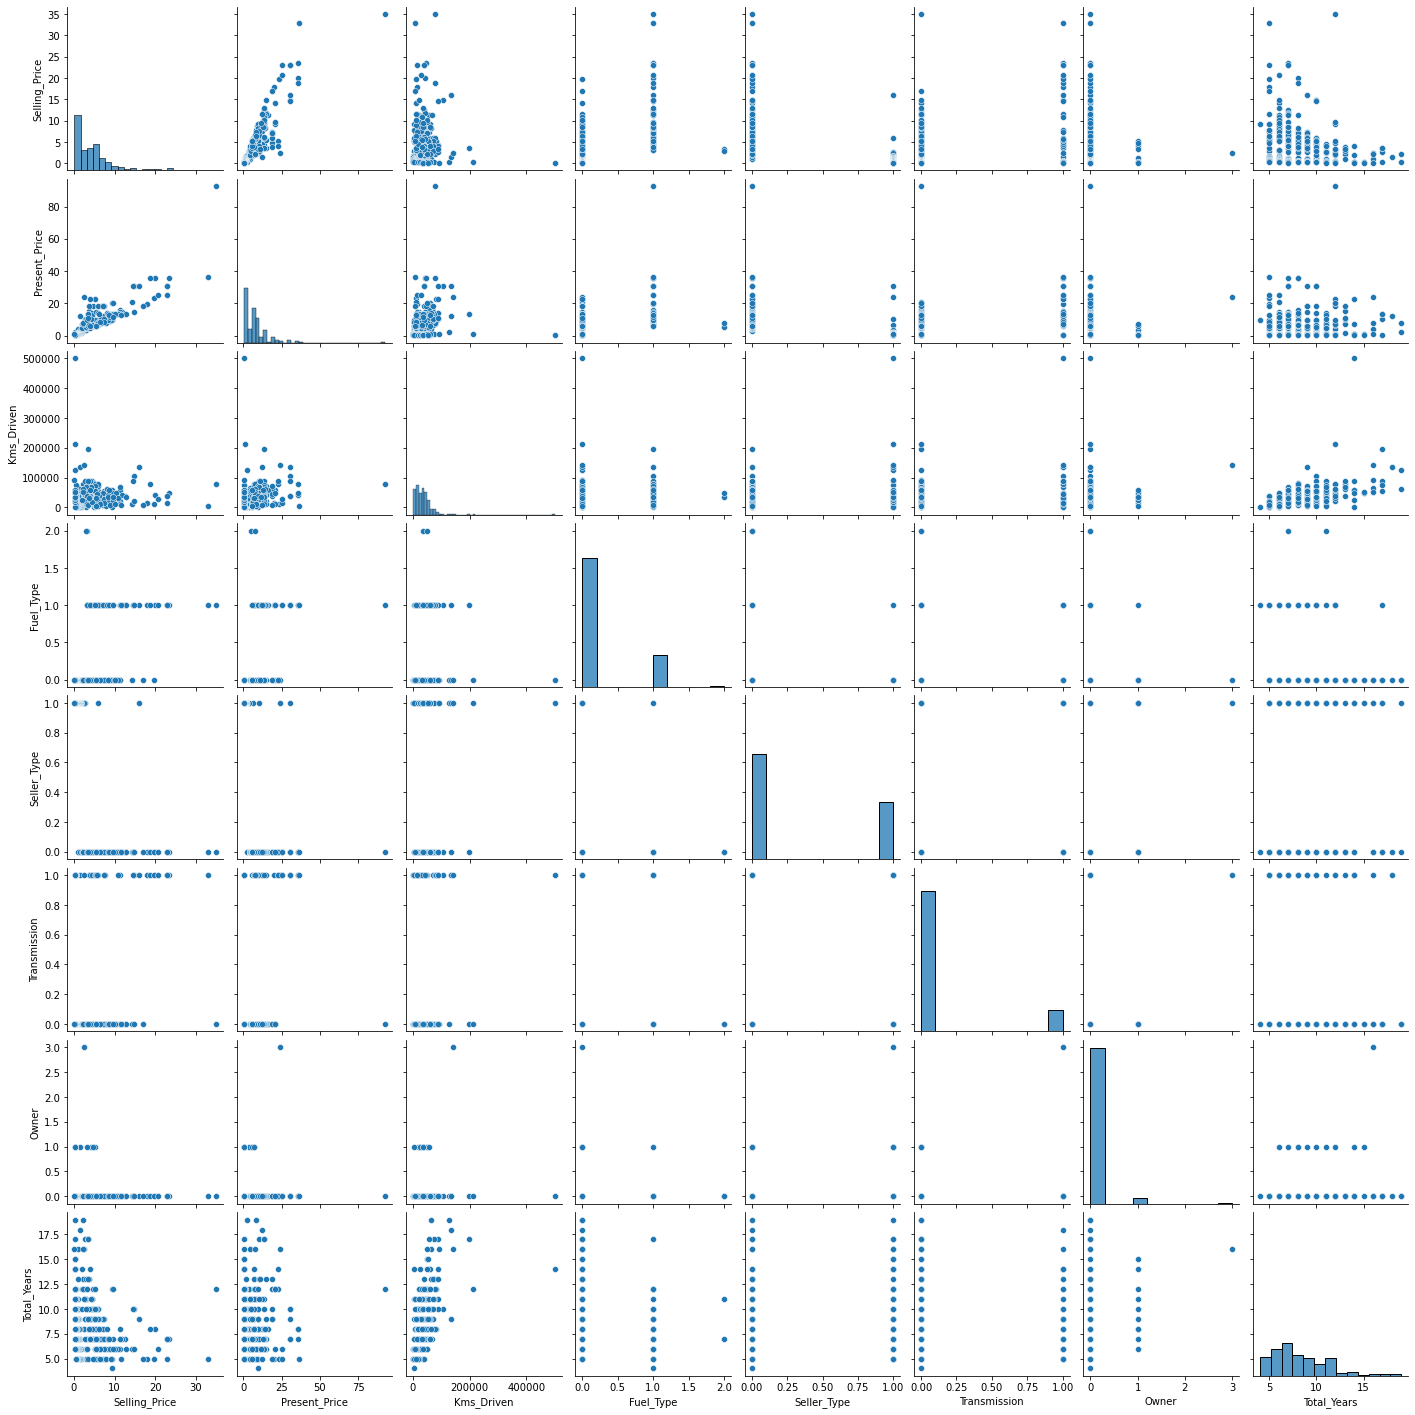

In [24]:
# Visualizing the correlation
sns.pairplot(final_dataset)

<AxesSubplot:>

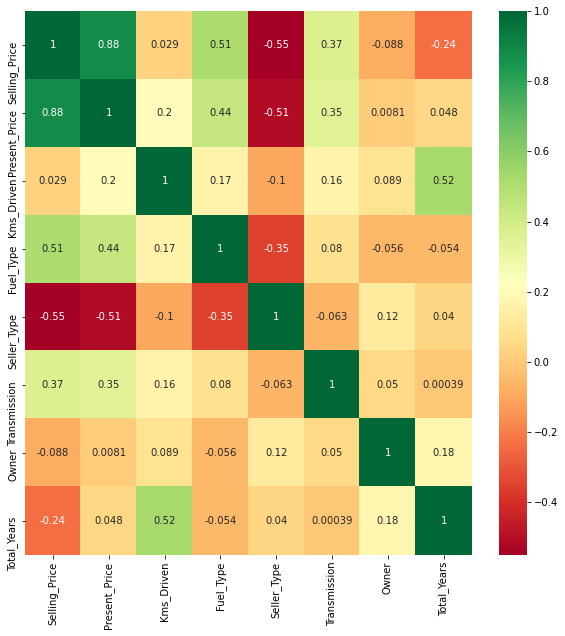

In [26]:
corrmat=final_dataset.corr() 
top_corr_features=corrmat.index 
plt.figure(figsize=(10,10)) 
sns.heatmap(final_dataset[top_corr_features].corr(),annot=True,cmap="RdYlGn")

# SPLITTING THE FEATURES AND TARGET

In [27]:
final_dataset.columns

Index(['Selling_Price', 'Present_Price', 'Kms_Driven', 'Fuel_Type',
       'Seller_Type', 'Transmission', 'Owner', 'Total_Years'],
      dtype='object')

#### INDEPENDENT FEATURES

In [28]:
x=final_dataset.iloc[:,1:]

In [29]:
x

,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Total_Years
0,5.59,27000,0,0,0,0,8
1,9.54,43000,1,0,0,0,9
2,9.85,6900,0,0,0,0,5
3,4.15,5200,0,0,0,0,11
4,6.87,42450,1,0,0,0,8
...,...,...,...,...,...,...,...
296,11.60,33988,1,0,0,0,6
297,5.90,60000,0,0,0,0,7
298,11.00,87934,0,0,0,0,13
299,12.50,9000,1,0,0,0,5


#### TARGET 

In [30]:
y=final_dataset.iloc[:,0]

In [31]:
y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

# FEATURE IMPORTANCE

In [32]:
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(x,y)

ExtraTreesRegressor()

In [33]:
print(model.feature_importances_)

[3.92254791e-01 4.13346362e-02 1.54908531e-01 2.47536907e-01
 8.85887091e-02 2.42792295e-04 7.51336339e-02]


# PLOTTING THE TOP FIVE FEATURES

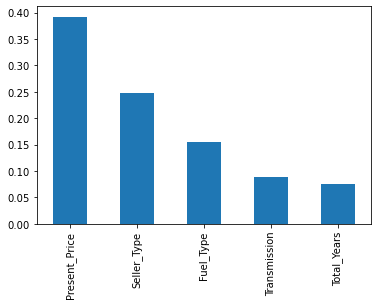

In [34]:
feat_importances=pd.Series(model.feature_importances_,index=x.columns)
feat_importances.nlargest(5).plot(kind="bar")
plt.show()

# TRAIN & TEST SPLIT OF THE MODEL

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [37]:
x_train.shape

(240, 7)

In [38]:
x_test.shape

(61, 7)

In [39]:
y_train.shape

(240,)

In [40]:
y_test.shape

(61,)

# TRAINING THE MODEL

### RANDOM FOREST

In [41]:
from sklearn.ensemble import RandomForestRegressor
rf_random=RandomForestRegressor()

### HYPER PARAMETER TUNING

In [42]:
n_estimators=[int(x) for x in np.linspace(start=100, stop=1200, num=12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [50]:
#Randomized Search CV

# Number of trees in Random Forest
n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=12)]

# Number of features to consider at every split
max_features=["auto","sqrt"]

# Maximum number of levels in tree
max_depth=[int(x) for x in np.linspace(5,30,num=6)]

# Minimum number of samples required to split a node
min_samples_split=[2,5,10,15,100]

# Minimum number of samples required at each leaf node
min_samples_leaf=[1,2,5,10]


In [60]:
from sklearn.model_selection import RandomizedSearchCV # Used for finding the best parameter
# NOTE: RandomizedSearchCV is faster than GridSearchCV

In [61]:
# Create the random grid
random_grid={"n_estimators":n_estimators,
             "max_features":max_features,
             "max_depth":max_depth,
             "min_samples_split":min_samples_split,
             "min_samples_leaf":min_samples_leaf}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [62]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf=RandomForestRegressor()


In [64]:
rf_random=RandomizedSearchCV(estimator=rf, param_distributions=random_grid, scoring="neg_mean_squared_error",n_iter=10,cv=5,verbose=2,random_state=42,n_jobs=1)

In [66]:
rf_random.fit(x,y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   3.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   3.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [67]:
predictions=rf_random.predict(x_test)

C:\Users\Priya\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

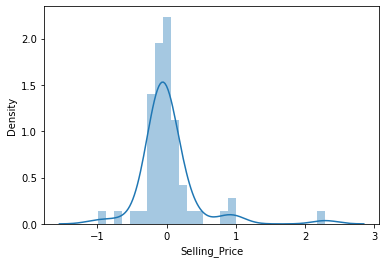

In [69]:
sns.distplot(y_test-predictions)

OBSERVATION:
- The distribution is normal

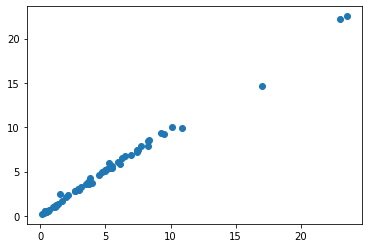

In [70]:
plt.scatter(y_test,predictions)

OBSERVATION:
- Plot is linear, indicates, prediction is good

# PICKLING THE FILE

In [75]:
import pickle
# Open a file, where you want to store the data
file=open("random_forest_regression_model.pkl","wb") #wb - Write Byte mode

# Dump information to that file
pickle.dump(rf_random,file)